In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('science')

In [183]:
# koi = pd.read_csv('pulsation timing/data/koi.csv')
koi = pd.read_csv('data/cumulative_2021.07.06_20.07.53.csv')
m = koi.koi_disposition == 'CONFIRMED'
m |= koi.koi_disposition == 'CANDIDATE'
koi = koi[m]
len(koi)
# m = koi['koi_steff'] > 6500
# koi = koi[m]

# from astroquery.mast import Observations, Catalogs
# result = Catalogs.query_criteria(catalog="Tic", KIC=koi.kepid.values).to_pandas()
# koi = pd.merge(koi, result, left_on='kepid', right_on='KIC')
# koi['kepid'] = koi['kepid'].astype('str')

4724

In [184]:
df = pd.read_csv('data/catalogues/berger_2020.tsv', delimiter='\t', 
#                  dtype={'KIC': str}
                )
missing = koi[~koi.kepid.isin(df.KIC)]
af = df[~df.KIC.isin(koi.kepid)]

In [185]:
koi = pd.merge(df, koi, left_on='KIC', right_on='kepid')
# m = koi['Teff'] > 5500
# koi = koi[m]

In [186]:
len(koi)

4485

# Simple HR

In [172]:
# Stellar tracks
Lcolnames = ["T11", "L11", "G11", "T12", "L12", "G12", "T13", "L13", "G13", "T14", "L14", "G14", "T15", "L15", "G15", "T16", "L16", "G16", "T17", "L17", "G17", "T18", "L18", "G18", "T19", "L19", "G19", "T20", "L20", "G20", "T21", "L21", "G21", "T22", "L22", "G22", "T23", "L23", "G23", "T24", "L24", "G24", "T25", "L25", "G25"]
Ltracks = pd.read_csv("data/tracks/mesa10108_as09_opal_exp150_mlt180_D000_z140x071_orig.csv",  header=None, sep=" ", names=Lcolnames, skiprows=([0]))
msL = pd.DataFrame(data={"Tms": Ltracks.loc[0][0::3].values, "Lms": Ltracks.loc[0][1::3].values, "Gms": Ltracks.loc[0][2::3].values})

Text(0, 0.5, 'Lum')

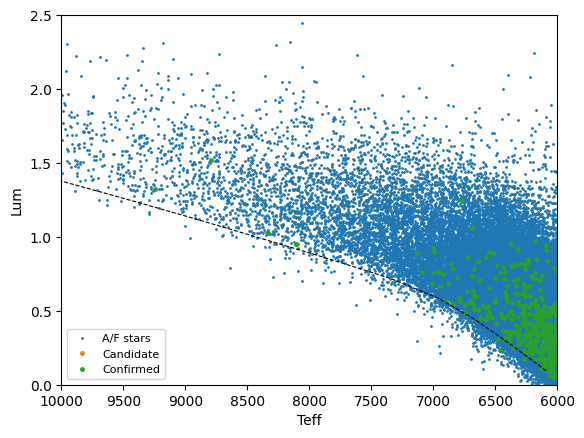

In [173]:
plt.plot(af['Teff'], af['Lum'], '.', ms=2, label='A/F stars')
# plt.plot(kep_conf['st_teff'], kep_conf['st_lum'], '.', label='Confirmed planets')
m = koi['koi_disposition'] == 'CONFIRMED'
plt.plot(koi['Teff'][~m], koi['Lum'][~m], '.', ms=5, label='Candidate')
plt.plot(koi['Teff'][m], koi['Lum'][m], '.', ms=5, label='Confirmed')
plt.plot(msL['Tms'], msL['Lms'], c='black', linewidth=0.8, linestyle='dashed')

# plt.plot(koi['koi_steff'][m], np.log10(koi['lum'][m]), '.', label='Confirmed planets')
# plt.plot(koi['koi_steff'][~m], np.log10(koi['lum'][~m]), '.', label='Candidate planets')
plt.xlim(10000, 6000)
plt.ylim(0, 2.5)
plt.legend(fontsize=8)
plt.xlabel('Teff')
plt.ylabel('Lum')

# Distribution?

In [174]:
plt.style.use('default')

In [213]:
df.columns

Index(['KIC', 'Mass', 'E_Mass', 'e_Mass', 'Teff', 'E_Teff', 'e_Teff', 'logg',
       'E_logg', 'e_logg', '[Fe/H]', 'E_[Fe/H]', 'e_[Fe/H]', 'Rad', 'E_Rad',
       'e_Rad', 'rho', 'E_rho', 'e_rho', 'Lum', 'E_Lum', 'e_Lum', 'Age',
       'f_Age', 'E_Age', 'e_Age', 'Dist', 'E_Dist', 'e_Dist', 'Avmag', 'GOF',
       'TAMS'],
      dtype='object')

In [232]:
col = 'Rad'

perc = np.percentile(df[col], [16, 50, 84])
binsize = 1.5*np.abs(np.median(df['e_' + col]))
# binsize=1
# bins = np.arange(6000, 10000, binsize)
bins = np.arange(perc[0], perc[2], binsize)
# bins = np.arange(0.1, 5, binsize)

digits_af = np.digitize(af[col], bins)
digits_koi = np.digitize(koi[col], bins)

for n in range(len(bins)):
    print(n, bins[n], len(af[col][digits_af == n+1]), len(koi[col][digits_koi == n+1]))

0 0.832 11247 436
1 0.9025 10517 345
2 0.973 9856 298
3 1.0434999999999999 9149 285
4 1.1139999999999999 8592 212
5 1.1844999999999999 7740 207
6 1.255 7422 189
7 1.3255 6641 163
8 1.396 6275 149
9 1.4665 5634 124
10 1.537 5366 132
11 1.6075 4686 88
12 1.678 4186 100
13 1.7485 3897 67
14 1.819 3261 57
15 1.8895 2983 53
16 1.96 2685 43
17 2.0305 2289 36
18 2.101 2106 26
19 2.1715 1776 30
20 2.242 1606 25
21 2.3125 1406 9
22 2.383 1239 14
23 2.4535 1058 14
24 2.524 990 15
25 2.5945 878 18
26 2.665 798 7
27 2.7355 29713 174


In [233]:
ratio = []
e_ratio = []
E_ratio = []
unc = []
for n in range(len(bins)):
    n_planet = len(koi['Mass'][digits_koi == n+1])
    n_star = len(af['Mass'][digits_af == n+1])
    ratio.append((n_planet / n_star) * 100)
    e_ratio.append((np.sqrt(n_star) / n_star)**2 + (np.sqrt(n_planet) / n_planet)**2)
    
err = (ratio * np.array(e_ratio))

Text(0, 0.5, 'Transit occurrence (%)')

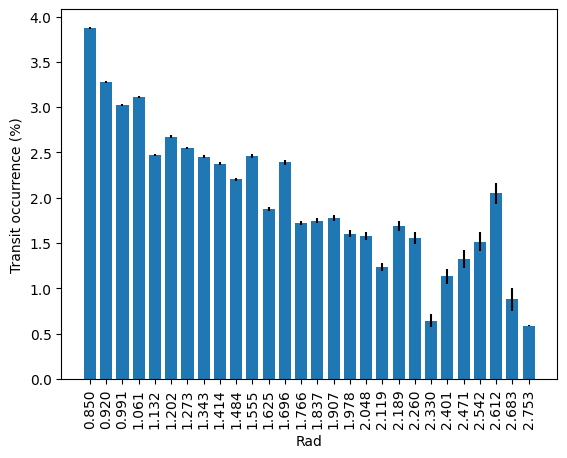

In [234]:
width = binsize - binsize/4
bar = np.average([bins, bins + binsize/2], axis=0)
plt.bar(bar, ratio, yerr=err, width=width, label='Combined')

plt.xticks(bar, rotation=90)
plt.xlabel(col)
plt.ylabel("Transit occurrence (%)")

## What about a KDE?

In [196]:
from sklearn.neighbors import KernelDensity

In [197]:
X_planet = koi['Rad'].values
X_af = af['Rad'].values

perc = np.percentile(df[col], [5, 95])
X_plot = np.linspace(0.0, 5, 50)

In [209]:
kernel='gaussian'

kde_planet = KernelDensity(kernel=kernel, bandwidth=1).fit(X_planet.reshape(-1,1))
kde_af = KernelDensity(kernel=kernel, bandwidth=1).fit(X_af.reshape(-1,1))

# ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')

In [210]:
dens_planet = kde_planet.score_samples(X_plot.reshape(-1,1))
dens_af = kde_af.score_samples(X_plot.reshape(-1,1))

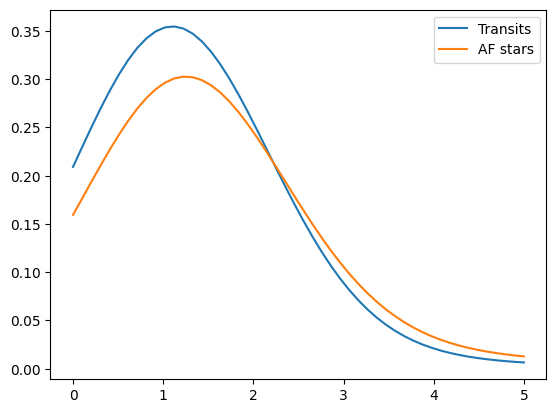

In [211]:
plt.plot(X_plot, np.exp(dens_planet), label='Transits')
plt.plot(X_plot, np.exp(dens_af), label='AF stars')
plt.legend()

Text(0, 0.5, 'Transit occurrence (%)')

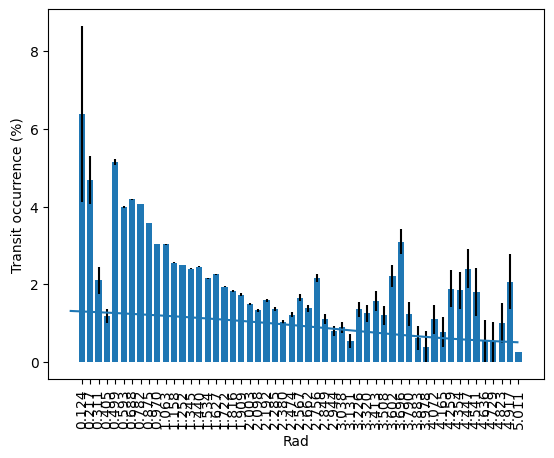

In [205]:
dens = np.exp(dens_planet) / np.exp(dens_af)
m = dens < 1e3
plt.plot(X_plot[m], dens[m])



width = binsize - binsize/4
bar = np.average([bins, bins + binsize/2], axis=0)
plt.bar(bar, ratio, yerr=err, width=width, label='Combined')

plt.xticks(bar, rotation=90)
plt.xlabel(col)
plt.ylabel("Transit occurrence (%)")

In [157]:
np.exp(dens_planet / dens_af)

array([2.34442303, 2.33467287, 2.32621714, 2.31942191, 2.31468239,
       2.31240954, 2.31301119, 2.31686791, 2.32430503, 2.33556315,
       2.35077061, 2.36992205, 2.39286681, 2.41931013, 2.44882804,
       2.48089449, 2.51491732, 2.55027802, 2.58637019, 2.62263226,
       2.65857158, 2.69377887, 2.72793345, 2.76080086, 2.79222494,
       2.82211655, 2.85044067, 2.87720347, 2.90244012, 2.92620404,
       2.94855791, 2.96956642, 2.98929086, 3.00778557, 3.02509619,
       3.04125965, 3.0563061 , 3.07026239, 3.08315706, 3.09502625,
       3.10591971, 3.11590598, 3.1250756 , 3.1335413 , 3.14143463,
       3.14889906, 3.15608027, 3.16311486, 3.17011919, 3.17717996])

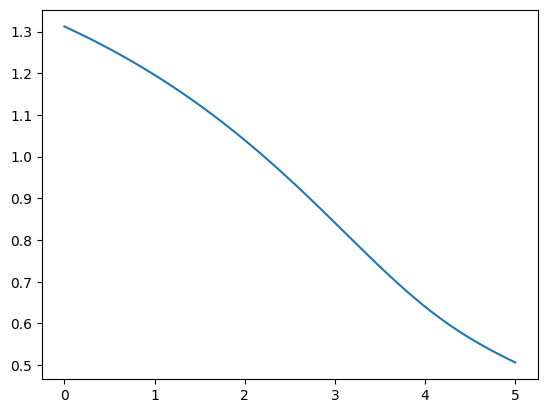

In [158]:
dens = np.exp(dens_planet) / np.exp(dens_af)
m = dens < 1e3
plt.plot(X_plot[m], dens[m])

# plt.ylim(0, 5000)

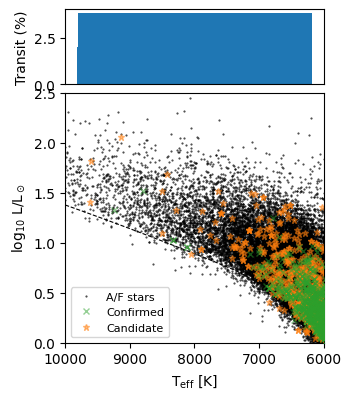

In [235]:
fig, axes = plt.subplots(2,1, figsize=[3.3333, 4.3329], 
                         gridspec_kw={'height_ratios': [0.3, 1]})

ax = axes[1]
ax.plot(af['Teff'], af['Lum'], '.', ms=1, label='A/F stars', c='k', alpha=0.8,rasterized=True)
m = koi['koi_disposition'] == 'CONFIRMED'
ax.errorbar(koi['Teff'][~m], koi['Lum'][~m], fmt='*', c='C1',alpha=0.5,
#             xerr=[koi['E_Teff'][~m], np.abs(koi['e_Teff'])[~m]], 
#             yerr=np.abs([koi['e_Lum'][~m], koi['E_Lum'][~m]]), 
            ms=5, label='Candidate',rasterized=True)
ax.plot(koi['Teff'][m], koi['Lum'][m], 'x', c='C2', ms=5, alpha=0.5, label='Confirmed', zorder=50, rasterized=True)

ax.plot(msL['Tms'], msL['Lms'], c='black', linewidth=0.8, linestyle='dashed')


ax.set_xlim(10000, 6000)
ax.set_ylim(0, 2.5)
plt.legend(fontsize=8)
ax.set_xlabel(r'T$_{\rm eff}$ [K]')
ax.set_ylabel(r'log$_{\rm 10}$ L/L$_\odot$')


ax = axes[0]
width = 400 #/ 3
bar = np.average([bins, bins + 1000], axis=0)
ax.bar(bar, ratio, width=width, label='Combined')
# plt.bar(bar+width, ratio_low, width=width, label='Confirmed')
# plt.bar(bar-width, ratio_hi, width=width, label='Candidate')
# plt.xticks(bar)
ax.set_xticks([])
# plt.legend()
# plt.xlabel("Teff [K]")
ax.set_ylabel("Transit (%)")
ax.invert_xaxis()

plt.subplots_adjust(hspace=0.05)

# plt.savefig('figs/occurrence.pdf', dpi=300, bbox_inches='tight')

In [33]:
plt.style.use('science')

In [1]:
koi['Lum'], koi['e_Lum']

NameError: name 'koi' is not defined

In [127]:
cand = [4380834,
5724523,
7767699,
8249829,
9895543]
# m = df.kic.isin(cand)

In [132]:
af[af.KIC.isin(cand)]['Teff']

22575     6775.0
46826     7779.0
86014     8059.8
98171     7487.6
136660    7806.7
Name: Teff, dtype: float64